http://127.0.0.1:11314


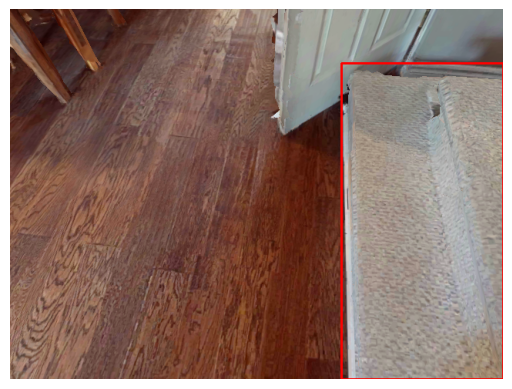

yes.


In [78]:
import ollama
import os
import subprocess
import cv2
import base64
from matplotlib import pyplot as plt

port = 11314
os.environ["OLLAMA_HOST"] = f'http://127.0.0.1:{port}'
ollama_host = os.getenv('OLLAMA_HOST')
print(ollama_host)
client = ollama.Client(
            host=ollama_host
        )

# encode an image to a buffer
# image_path = '/root/Projects/SG-VLN/dump/apr15_baseline_gt_perception/objectnav-dino/perception_benchmark/4ok3usBNeis_6/rgb/0023.png'
image_path = '/root/Projects/SG-VLN/dump/apr15_baseline_gt_perception/objectnav-dino/perception_benchmark/5cdEh9F2hJL_23/rgb/0108.png'
image_path = '/root/Projects/SG-VLN/dump/apr15_baseline_gt_perception/objectnav-dino/perception_benchmark/XB4GS9ShBRE_62/rgb/0004.png'
image = cv2.imread(image_path)
# darw a rectangle on the image
image = cv2.rectangle(image, (430, 70), (640, 480), (0, 0, 255), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.imshow(image)
plt.axis('off')
plt.show()
retval, buffer = cv2.imencode('.png', image)
base64_image = base64.b64encode(buffer).decode('utf-8')

llm_name='llama3.2-vision'
target = 'stair'
prompt = f"You are a verification agent that helps a robot agent in a 3D environment looking for objects in the scene. Please verify if the object in the image enclosed by the red bounding box is a '{target}' or not. Answer with 'yes' or 'no' enclosed by quataion marks with no additional text. If the object is not a '{target}', please only provide the name of the object in the image." 
# send the image to the LLM
messages = [{'role': 'user', 
             'content': prompt, 
             'images': [base64_image]}]
response = client.chat(model=llm_name, messages=messages)
print(response.message.content.lower())

In [ ]:
port = 11314
os.environ["OLLAMA_HOST"] = f'http://127.0.0.1:{port}'
os_env = os.environ.copy()
os_env["CUDA_VISIBLE_DEVICES"] = 0
ollama_process = subprocess.Popen(
        ["ollama", "serve"],
        bufsize=-1,
        env=os_env,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
    )